In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.display import display
from comparers import ModelComparer, plot_decision_boundary
from util import RuleClassifier, find_counterfactuals, counterfactuals_to_constraint_matrix, get_complexity,\
                 group_metrics
from surrogate_tree import train_surrogate_tree, plot_surrogate_tree,\
                 get_feature_importances, plot_feature_importances, plot_tree_leafs_for_class,\
                 tree_to_constraint_matrix, extract_rules, print_rules,\
                 get_pruned_trees, eval_trees

In [2]:
with open('task.pickle', 'rb') as f:
    clf_a, clf_b, X, y, feature_names, feature_precisions = pickle.load(f)

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

In [4]:
mclass_diff = comparer.predict_mclass_diff(X)

# Explanations

In [5]:
%%time
trees = []
full_tree = train_surrogate_tree(X, mclass_diff)
trees = get_pruned_trees(full_tree, X, mclass_diff)
tree_it = iter(trees)
len(trees)

CPU times: user 44.1 ms, sys: 3.44 ms, total: 47.5 ms
Wall time: 48.8 ms


23

## 2 Leafs

In [6]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.09767705069039706, 1, 2)

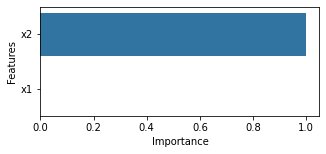

In [7]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

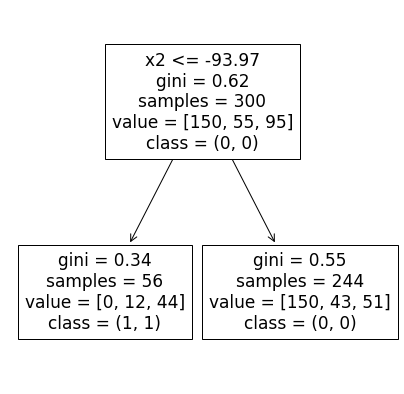

In [8]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [9]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 3 Leafs

In [10]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.08525998905309248, 2, 3)

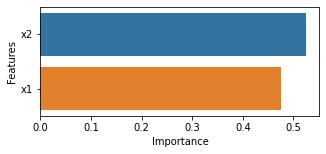

In [11]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

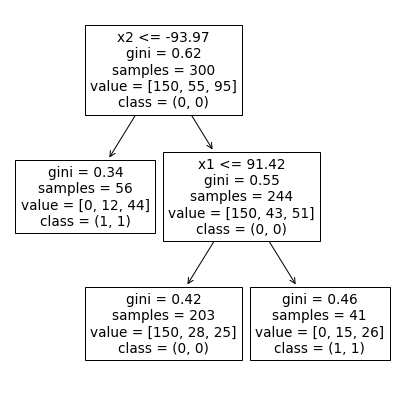

In [12]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [13]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

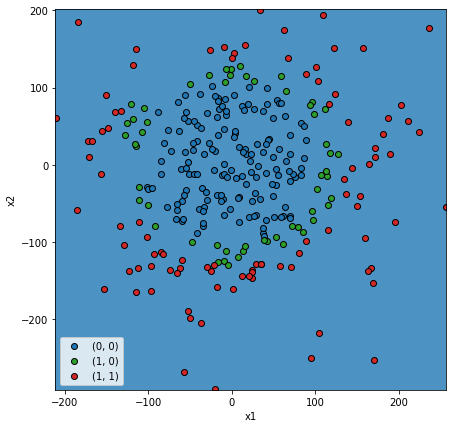

In [14]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

## 4 Leafs

In [15]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.07820698762107348, 3, 4)

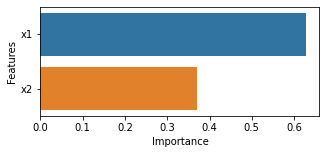

In [16]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

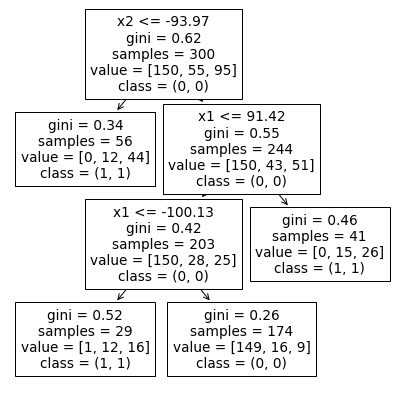

In [17]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [18]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

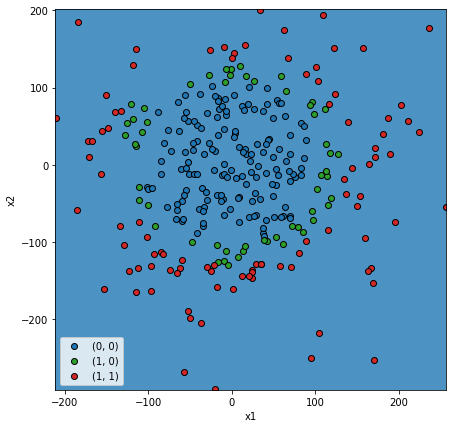

In [19]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

## 5 Leafs

In [20]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.032489594273933185, 4, 5)

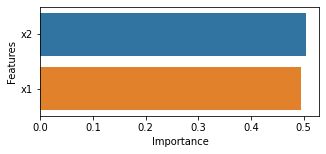

In [21]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

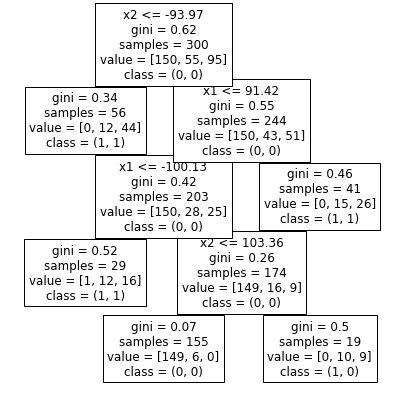

In [22]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [23]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -100.12665557861328 < x1 <= 91.42350769042969 and x2 > 103.3619155883789 => (1, 0) [0, 10, 9]


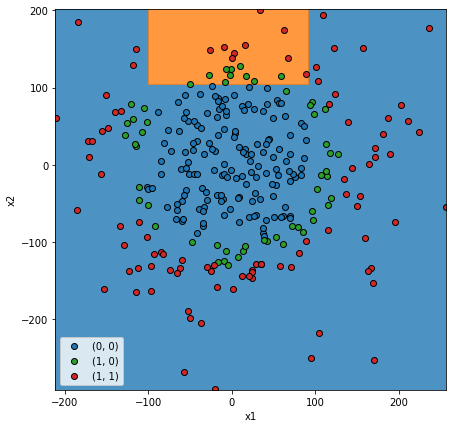

In [24]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

## 6 Leafs

In [25]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.02932471264367816, 4, 6)

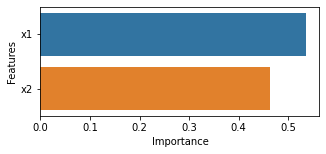

In [26]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

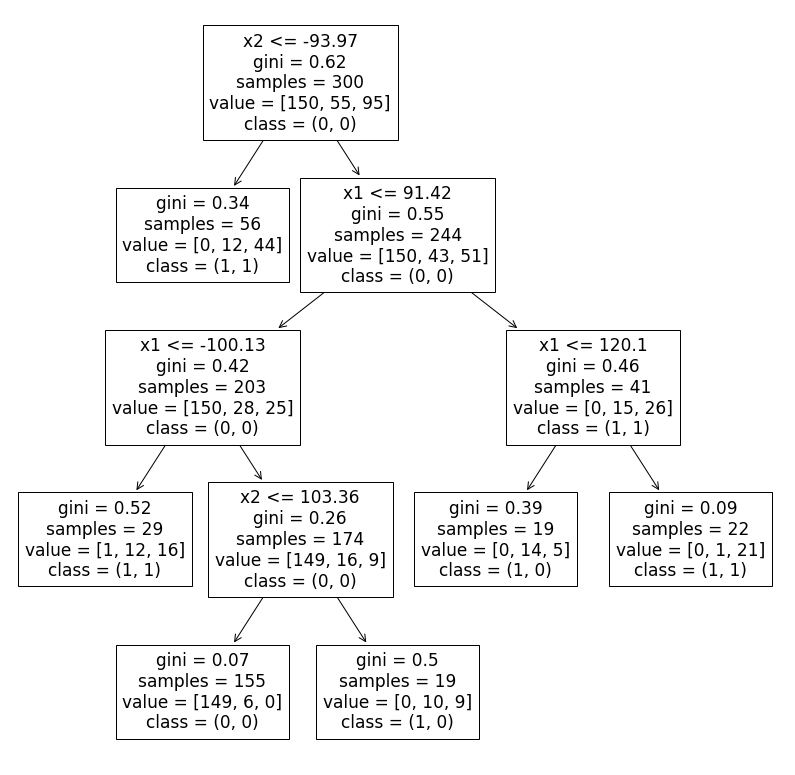

In [27]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [28]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.42350769042969 < x1 <= 120.10496520996094 and x2 > -93.97050857543945 => (1, 0) [0, 14, 5]
2. -100.12665557861328 < x1 <= 91.42350769042969 and x2 > 103.3619155883789 => (1, 0) [0, 10, 9]


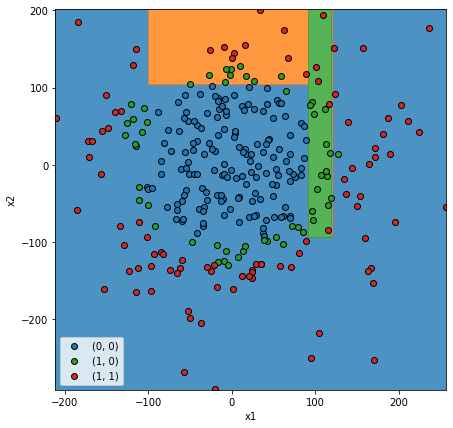

In [29]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

## 7 Leafs

In [30]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.025518341307814992, 4, 7)

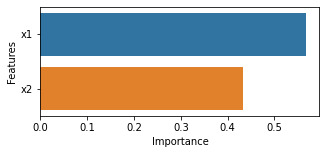

In [31]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

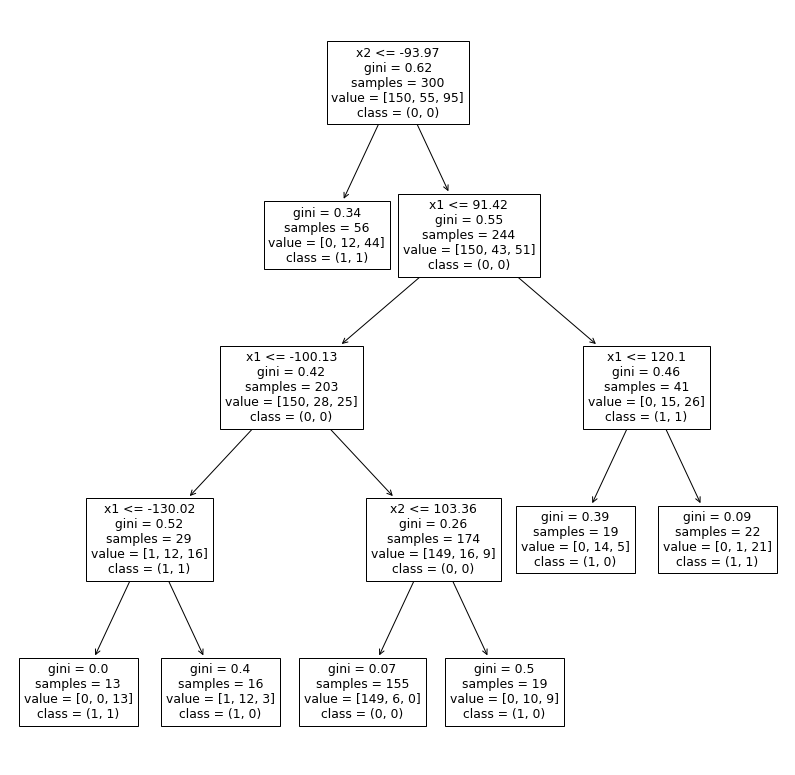

In [32]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [33]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.42350769042969 < x1 <= 120.10496520996094 and x2 > -93.97050857543945 => (1, 0) [0, 14, 5]
2. -100.12665557861328 < x1 <= 91.42350769042969 and x2 > 103.3619155883789 => (1, 0) [0, 10, 9]
3. -130.01915740966797 < x1 <= -100.12665557861328 and x2 > -93.97050857543945 => (1, 0) [1, 12, 3]


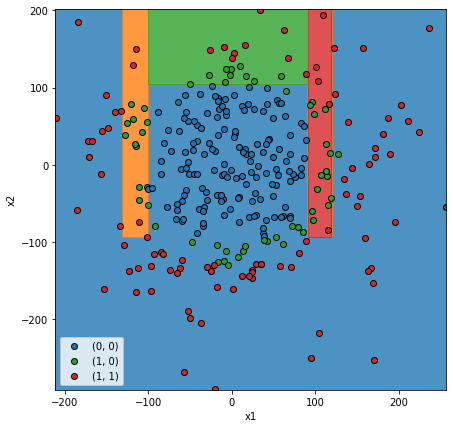

In [34]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

## 8 Leafs

In [35]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.02337566137566139, 5, 8)

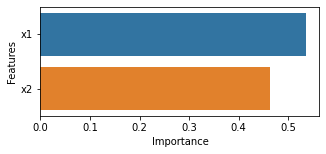

In [36]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

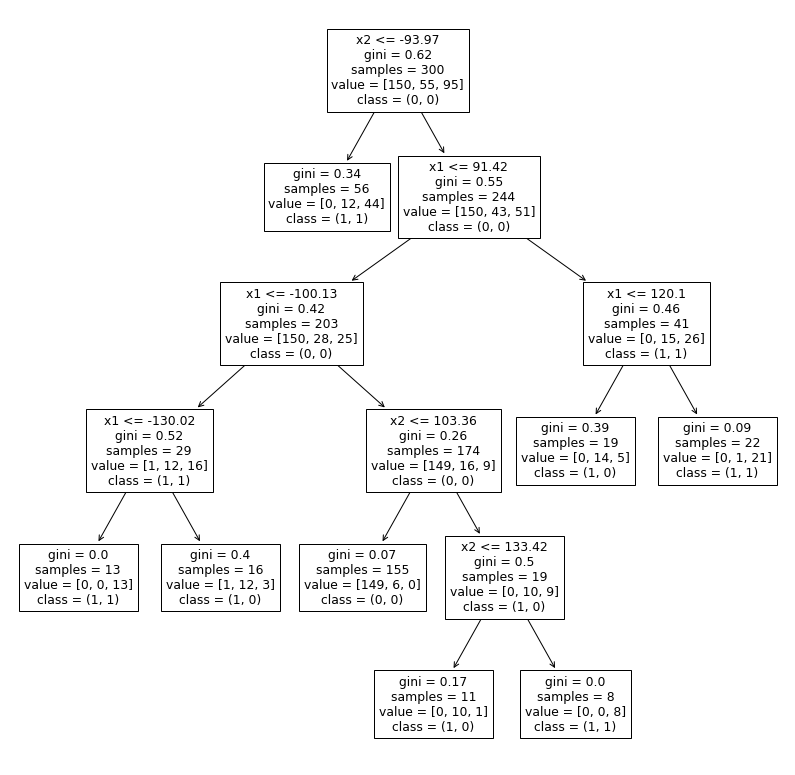

In [37]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [38]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.42350769042969 < x1 <= 120.10496520996094 and x2 > -93.97050857543945 => (1, 0) [0, 14, 5]
2. -130.01915740966797 < x1 <= -100.12665557861328 and x2 > -93.97050857543945 => (1, 0) [1, 12, 3]
3. -100.12665557861328 < x1 <= 91.42350769042969 and 103.3619155883789 < x2 <= 133.41622924804688 => (1, 0) [0, 10, 1]


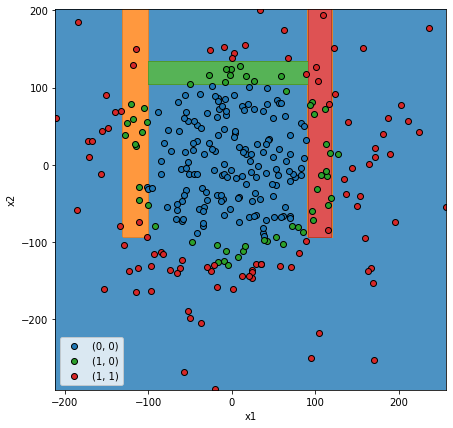

In [39]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

## 9 Leafs

In [40]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.017285714285714283, 5, 9)

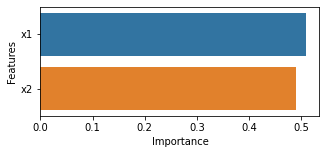

In [41]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

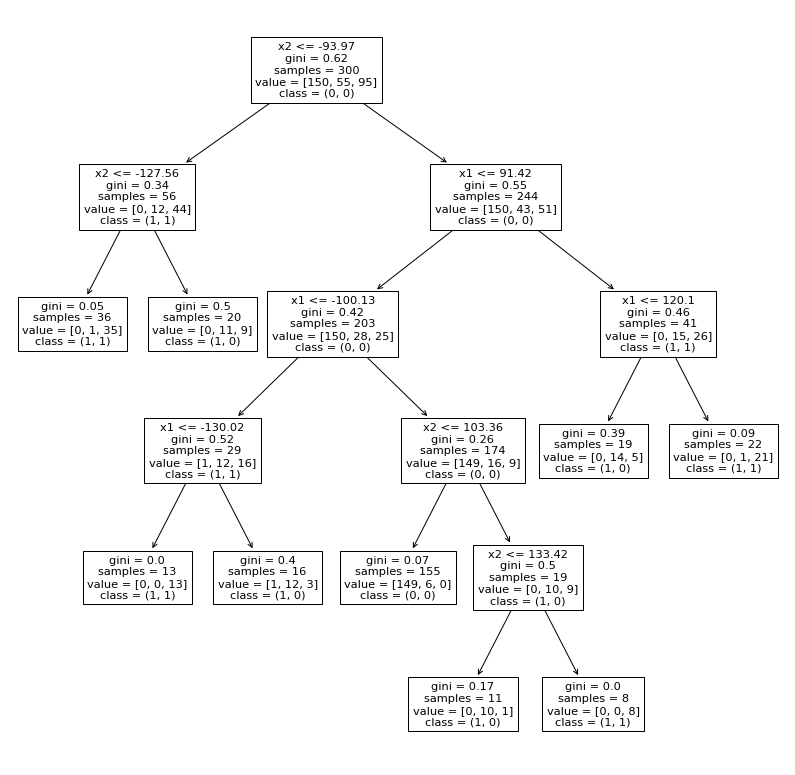

In [42]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [43]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -127.56469345092773 < x2 <= -93.97050857543945 => (1, 0) [0, 11, 9]
2. 91.42350769042969 < x1 <= 120.10496520996094 and x2 > -93.97050857543945 => (1, 0) [0, 14, 5]
3. -130.01915740966797 < x1 <= -100.12665557861328 and x2 > -93.97050857543945 => (1, 0) [1, 12, 3]
4. -100.12665557861328 < x1 <= 91.42350769042969 and 103.3619155883789 < x2 <= 133.41622924804688 => (1, 0) [0, 10, 1]


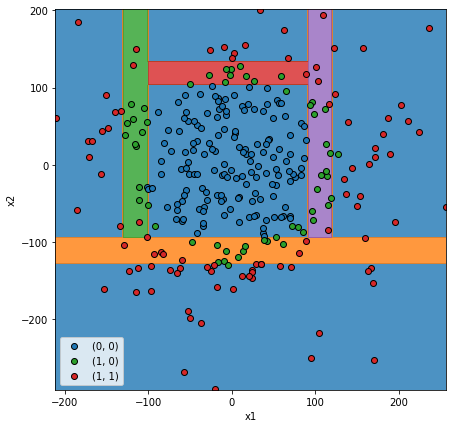

In [44]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

## 10 Leafs

In [45]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.01571428571428572, 5, 10)

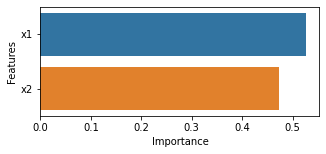

In [46]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

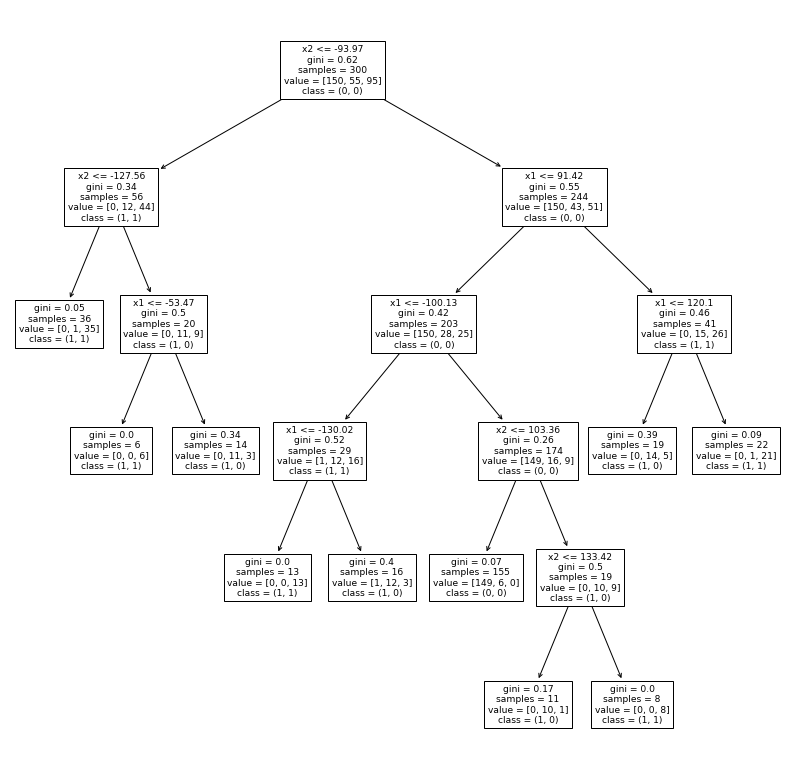

In [47]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [48]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.42350769042969 < x1 <= 120.10496520996094 and x2 > -93.97050857543945 => (1, 0) [0, 14, 5]
2. -130.01915740966797 < x1 <= -100.12665557861328 and x2 > -93.97050857543945 => (1, 0) [1, 12, 3]
3. x1 > -53.467485427856445 and -127.56469345092773 < x2 <= -93.97050857543945 => (1, 0) [0, 11, 3]
4. -100.12665557861328 < x1 <= 91.42350769042969 and 103.3619155883789 < x2 <= 133.41622924804688 => (1, 0) [0, 10, 1]


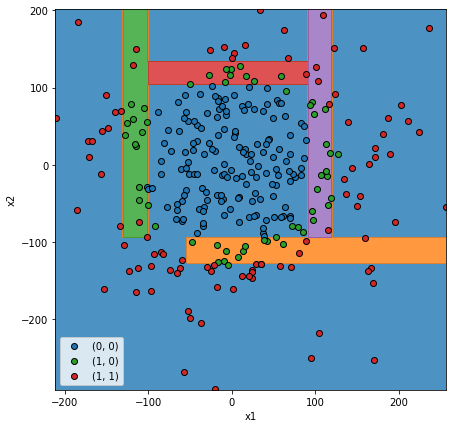

In [49]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

## 11 Leafs

In [50]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.01516425658138669, 5, 11)

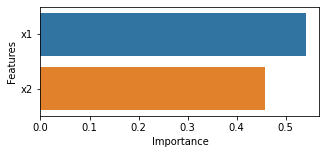

In [51]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

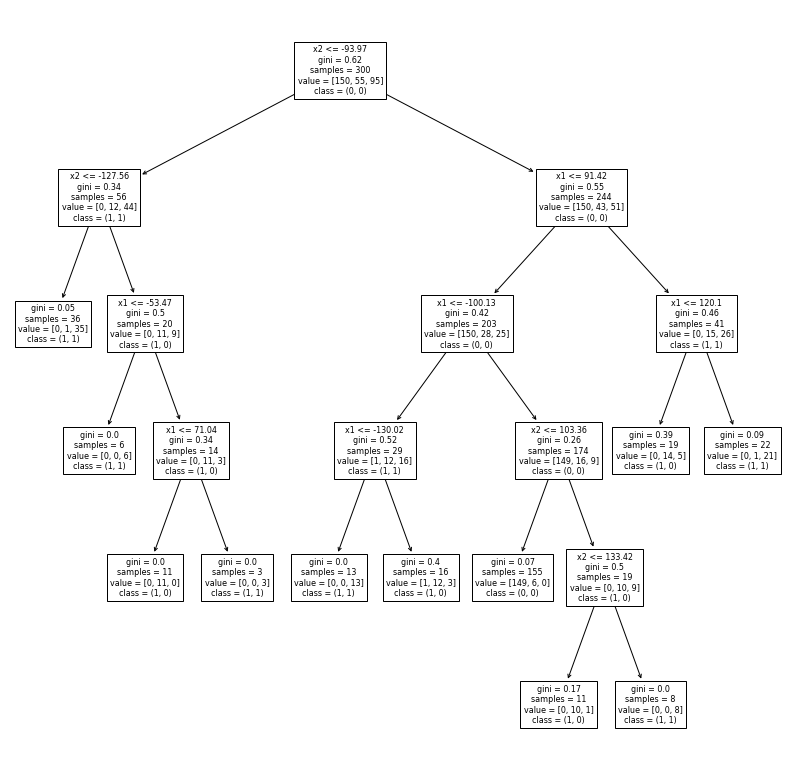

In [52]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [53]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.42350769042969 < x1 <= 120.10496520996094 and x2 > -93.97050857543945 => (1, 0) [0, 14, 5]
2. -130.01915740966797 < x1 <= -100.12665557861328 and x2 > -93.97050857543945 => (1, 0) [1, 12, 3]
3. -100.12665557861328 < x1 <= 91.42350769042969 and 103.3619155883789 < x2 <= 133.41622924804688 => (1, 0) [0, 10, 1]
4. -53.467485427856445 < x1 <= 71.03667259216309 and -127.56469345092773 < x2 <= -93.97050857543945 => (1, 0) [0, 11, 0]


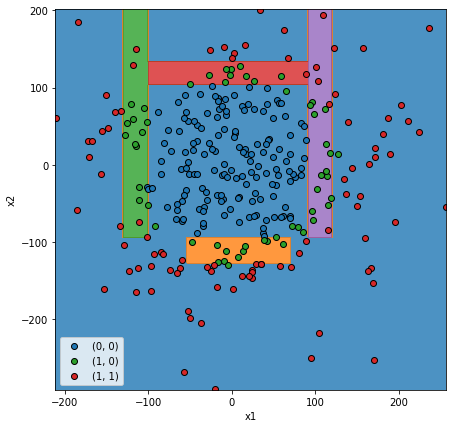

In [54]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

## 12 Leafs

In [55]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.013037593984962402, 5, 12)

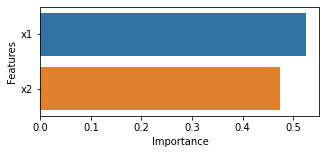

In [56]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

In [57]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.42350769042969 < x1 <= 120.10496520996094 and x2 > -93.97050857543945 => (1, 0) [0, 14, 5]
2. -130.01915740966797 < x1 <= -100.12665557861328 and x2 > -93.97050857543945 => (1, 0) [1, 12, 3]
3. -100.12665557861328 < x1 <= 91.42350769042969 and 103.3619155883789 < x2 <= 133.41622924804688 => (1, 0) [0, 10, 1]
4. -53.467485427856445 < x1 <= 71.03667259216309 and -127.56469345092773 < x2 <= -93.97050857543945 => (1, 0) [0, 11, 0]


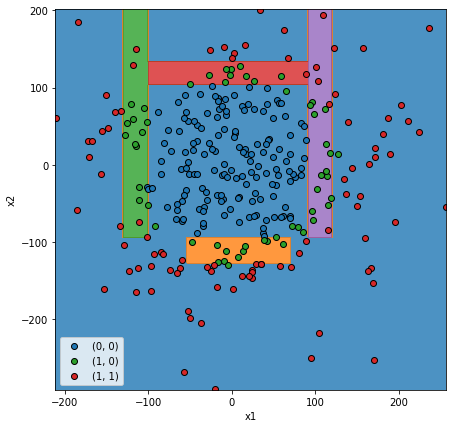

In [58]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

## 13 Leafs

In [59]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.01111111111111111, 5, 13)

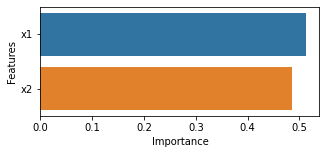

In [60]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

In [61]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -130.01915740966797 < x1 <= -100.12665557861328 and x2 > -93.97050857543945 => (1, 0) [1, 12, 3]
2. 91.42350769042969 < x1 <= 120.10496520996094 and -93.97050857543945 < x2 <= 78.12676620483398 => (1, 0) [0, 13, 1]
3. -100.12665557861328 < x1 <= 91.42350769042969 and 103.3619155883789 < x2 <= 133.41622924804688 => (1, 0) [0, 10, 1]
4. -53.467485427856445 < x1 <= 71.03667259216309 and -127.56469345092773 < x2 <= -93.97050857543945 => (1, 0) [0, 11, 0]


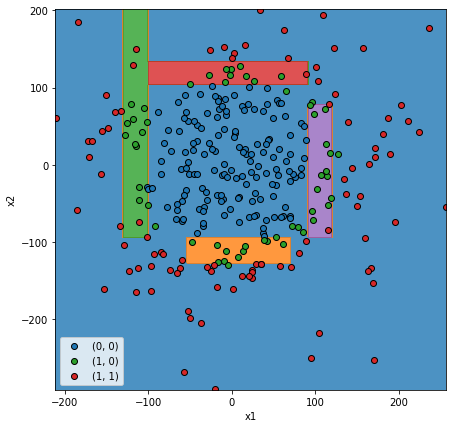

In [62]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

## 14 Leafs

In [63]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.0093452380952381, 6, 14)

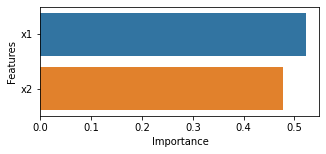

In [64]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

In [65]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. -130.01915740966797 < x1 <= -100.12665557861328 and x2 > -93.97050857543945 => (1, 0) [1, 12, 3]
2. 91.42350769042969 < x1 <= 120.10496520996094 and -93.97050857543945 < x2 <= 78.12676620483398 => (1, 0) [0, 13, 1]
3. -100.12665557861328 < x1 <= 91.42350769042969 and 103.3619155883789 < x2 <= 133.41622924804688 => (1, 0) [0, 10, 1]
4. -53.467485427856445 < x1 <= 71.03667259216309 and -127.56469345092773 < x2 <= -93.97050857543945 => (1, 0) [0, 11, 0]
5. 45.86721611022949 < x1 <= 91.42350769042969 and -93.97050857543945 < x2 <= -77.32994079589844 => (1, 0) [0, 4, 0]


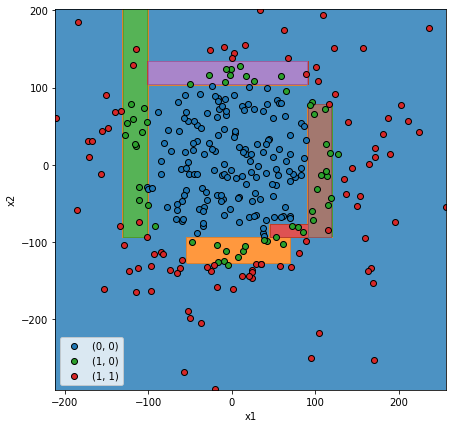

In [66]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

## 15 Leafs

In [67]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.006190476190476192, 6, 15)

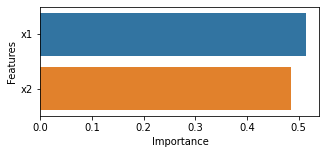

In [68]:
feature_importances, feature_order = get_feature_importances(tree)
plot_feature_importances(feature_names, feature_importances, feature_order)

In [69]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. 91.42350769042969 < x1 <= 120.10496520996094 and -93.97050857543945 < x2 <= 78.12676620483398 => (1, 0) [0, 13, 1]
2. -130.01915740966797 < x1 <= -100.12665557861328 and -93.97050857543945 < x2 <= 103.97916793823242 => (1, 0) [1, 12, 1]
3. -100.12665557861328 < x1 <= 91.42350769042969 and 103.3619155883789 < x2 <= 133.41622924804688 => (1, 0) [0, 10, 1]
4. -53.467485427856445 < x1 <= 71.03667259216309 and -127.56469345092773 < x2 <= -93.97050857543945 => (1, 0) [0, 11, 0]
5. 45.86721611022949 < x1 <= 91.42350769042969 and -93.97050857543945 < x2 <= -77.32994079589844 => (1, 0) [0, 4, 0]


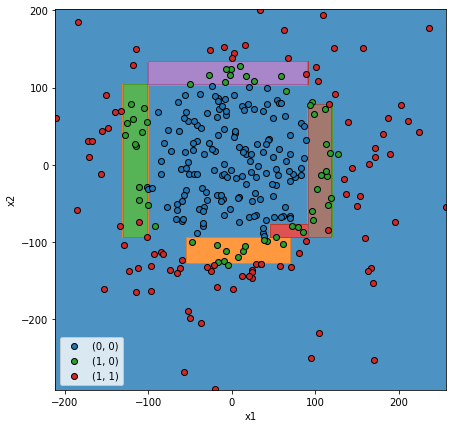

In [70]:
plot_tree_leafs_for_class(tree, comparer.class_names, comparer.difference_class_names, X, mclass_diff, feature_names)

# Evaluation

In [71]:
with open('test.pickle', 'rb') as f:
    X_test, y_test = pickle.load(f)

In [72]:
metrics = eval_trees(trees, feature_names, comparer.class_names, X_test=X_test, y_test=y_test)
metrics

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


,Precision,Recall,F1 Score,Support,Label,Leafs,Alpha,Rules,Constraints
"(0, 0)",0.533416,0.987535,0.692681,4332.0,"(0, 0)",2,0.097677,1,1
"(1, 1)",0.793939,0.389784,0.522867,4033.0,"(1, 1)",2,0.097677,1,1
"(0, 0)",0.635607,0.969991,0.767980,4332.0,"(0, 0)",3,0.085260,1,2
"(1, 1)",0.752729,0.632532,0.687416,4033.0,"(1, 1)",3,0.085260,2,3
"(0, 0)",0.777673,0.955217,0.857350,4332.0,"(0, 0)",4,0.078207,1,3
...,...,...,...,...,...,...,...,...,...
"(1, 0)",0.742206,0.757187,0.749622,1635.0,"(1, 0)",26,0.003077,10,38
"(1, 1)",0.960977,0.946442,0.953654,4033.0,"(1, 1)",26,0.003077,13,38
"(0, 0)",0.942453,0.952678,0.947538,4332.0,"(0, 0)",28,0.000000,4,16
"(1, 0)",0.745300,0.751682,0.748477,1635.0,"(1, 0)",28,0.000000,11,42


In [73]:
grouped_metrics, constraints = group_metrics(metrics, by='Alpha')

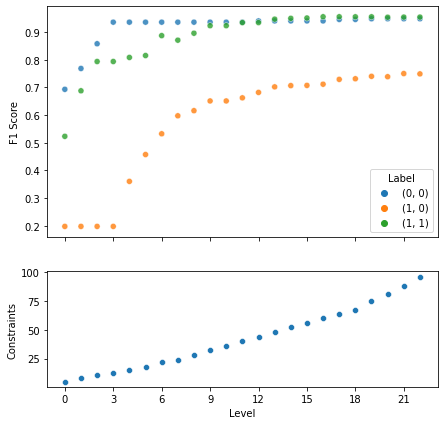

In [75]:
fig, axs = plt.subplots(nrows=2, figsize=(7, 7), sharex='all', gridspec_kw={'height_ratios': [2,1]})
sns.scatterplot(data=grouped_metrics, x='Level', y='F1 Score', hue='Label', alpha=0.8, ax=axs[0])
sns.scatterplot(data=constraints, ax=axs[1])
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('gaussian-baseline-fidelity.pdf')

In [76]:
grouped_metrics

Label  Precision    Recall  F1 Score  Support  Leafs     Alpha  \
Level                                                                      
0     0  (0, 0)   0.533416  0.987535  0.692681   4332.0    2.0  0.097677   
      1  (1, 0)   0.294189  0.148624  0.197481   1635.0    5.0  0.032490   
      2  (1, 1)   0.793939  0.389784  0.522867   4033.0    2.0  0.097677   
1     0  (0, 0)   0.635607  0.969991  0.767980   4332.0    3.0  0.085260   
      1  (1, 0)   0.294189  0.148624  0.197481   1635.0    5.0  0.032490   
...         ...        ...       ...       ...      ...    ...       ...   
21    1  (1, 0)   0.742206  0.757187  0.749622   1635.0   26.0  0.003077   
      2  (1, 1)   0.960977  0.946442  0.953654   4033.0   26.0  0.003077   
22    0  (0, 0)   0.942453  0.952678  0.947538   4332.0   28.0  0.000000   
      1  (1, 0)   0.745300  0.751682  0.748477   1635.0   28.0  0.000000   
      2  (1, 1)   0.960977  0.946442  0.953654   4033.0   28.0  0.000000   

         Rules  Constraints  
Level                        
0     0    1.0          1.0  
      1    1.0          3.0  
      2    1.0          1.0  
1     0    1.0          2.0  
      1    1.0          3.0  
...        ...          ...  
21    1   10.0         38.0  
      2   13.0         38.0  
22    0    4.0         16.0  
      1   11.0         42.0  
      2   13.0         38.0  

[69 rows x 9 columns]

In [77]:
constraints

Level
0      5.0
1      8.0
2     11.0
3     12.0
4     15.0
5     18.0
6     22.0
7     24.0
8     28.0
9     32.0
10    36.0
11    40.0
12    44.0
13    48.0
14    52.0
15    56.0
16    60.0
17    64.0
18    67.0
19    75.0
20    81.0
21    88.0
22    96.0
Name: Constraints, dtype: float64